In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("baseballdata.csv")
df=pd.DataFrame(data=df)
df.rename(inplace=True,columns={"W":"Wins","R":"Runs","AB":"At Bats","H":"Hits","2B":"Doubles","3B":"Triples","HR":"Homeruns",
                     "BB":"Walks","SO":"Strikeouts","SB":"Stolen bases","RA":"Runs Allowed","ER":"Earned Runs","ERA":"Earned runs avg",
                     "CG":"Complete games","SHO":"Shutouts","SV":"Saves","E":"Errors"})
df

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen bases,Runs Allowed,Earned Runs,Earned runs avg,Complete games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
# -- Input features: 
# W --- WALKS
# R---  Runs, 
# AB ---- At Bats, 
# H---- -Hits, 
# 2B----Doubles,
# 3B----Triples, 
# HR-----Homeruns,
#BB---- base on balls or walks
# SO----- Strikeouts,
# SB-----Stolen Bases,
# RA-----Runs Allowed,
# ER-----Earned Runs,
# ERA----Earned Run Average (ERA),
# CG--- complete games
# SHO----Shutouts,
# SV------Saves,
#  E---- Errors.

#output features 

# W --- Wins

In [4]:
df.describe()
#as we can see from the mean and the median that is a s little rightly skewed data because mean is a little more than the median

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen bases,Runs Allowed,Earned Runs,Earned runs avg,Complete games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [5]:
df.shape

(30, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
Wins               30 non-null int64
Runs               30 non-null int64
At Bats            30 non-null int64
Hits               30 non-null int64
Doubles            30 non-null int64
Triples            30 non-null int64
Homeruns           30 non-null int64
Walks              30 non-null int64
Strikeouts         30 non-null int64
Stolen bases       30 non-null int64
Runs Allowed       30 non-null int64
Earned Runs        30 non-null int64
Earned runs avg    30 non-null float64
Complete games     30 non-null int64
Shutouts           30 non-null int64
Saves              30 non-null int64
Errors             30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
df.isnull().any()

Wins               False
Runs               False
At Bats            False
Hits               False
Doubles            False
Triples            False
Homeruns           False
Walks              False
Strikeouts         False
Stolen bases       False
Runs Allowed       False
Earned Runs        False
Earned runs avg    False
Complete games     False
Shutouts           False
Saves              False
Errors             False
dtype: bool

# EDA

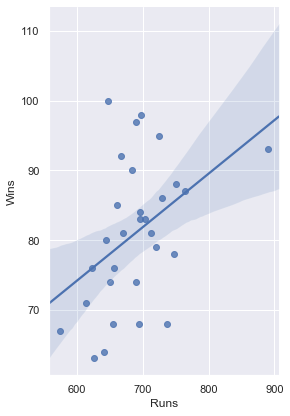

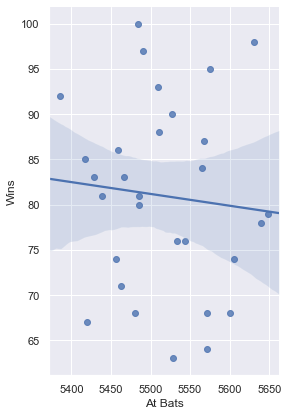

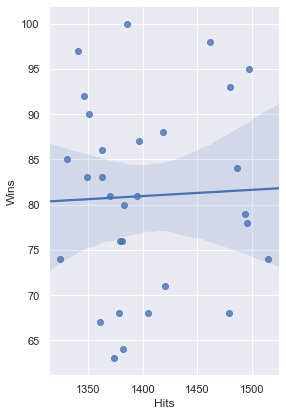

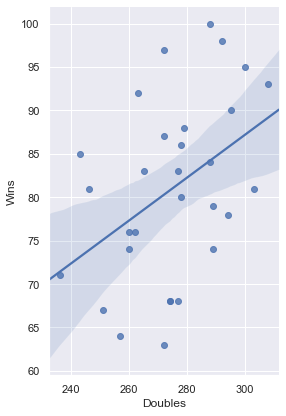

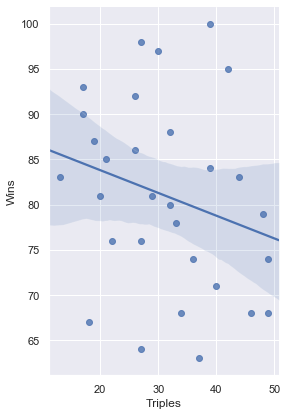

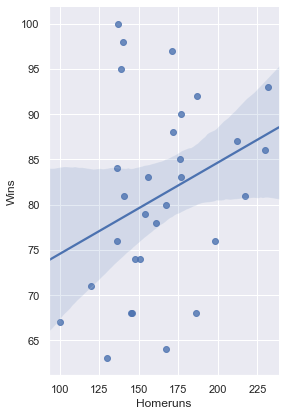

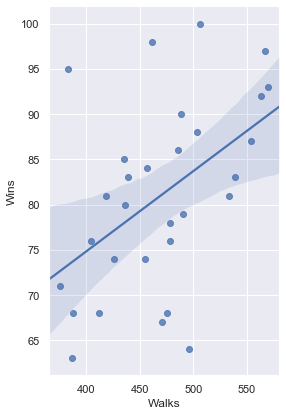

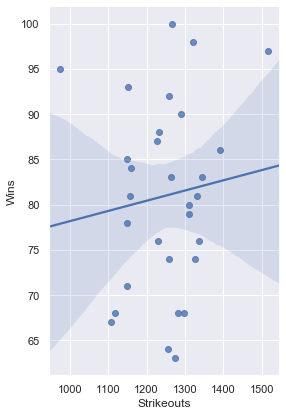

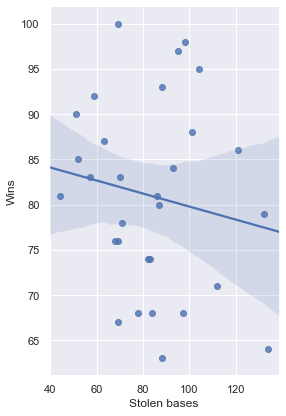

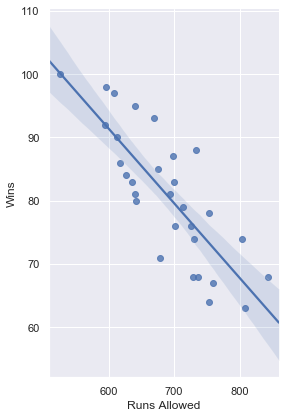

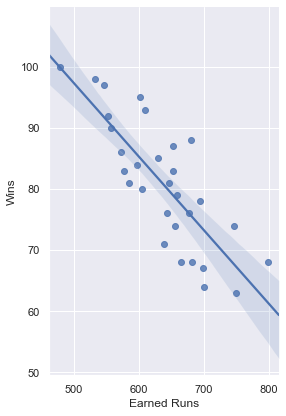

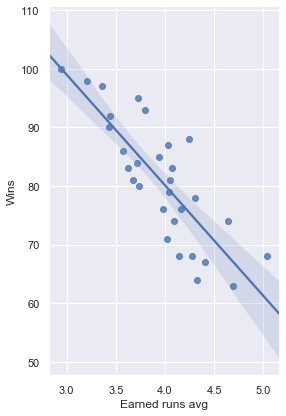

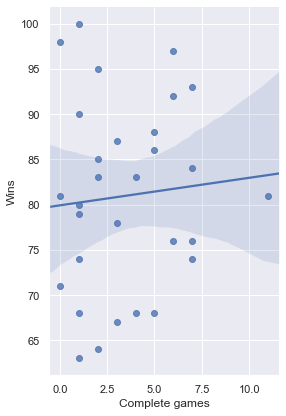

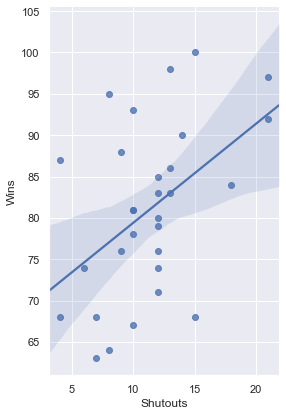

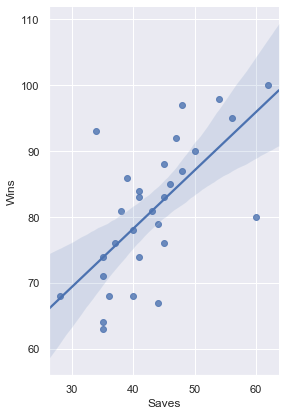

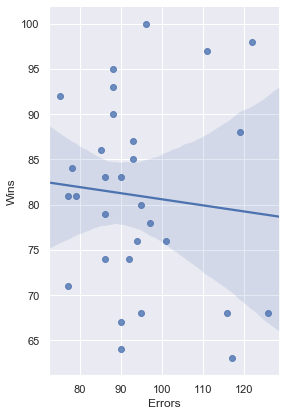

In [8]:
sns.set(style="darkgrid")
independent=df.iloc[:,1:]
independent.columns
for i in independent:
    sns.pairplot(data=df, x_vars=i, y_vars='Wins', size=6, aspect=0.7, kind='reg')
#checking out the linear regresison between the output="wins" and independent variables 
#if the linear regression is not strong between the y and x features i will drop those columns afterwards.
#

Text(0.5, 1, 'correlation between all the features')

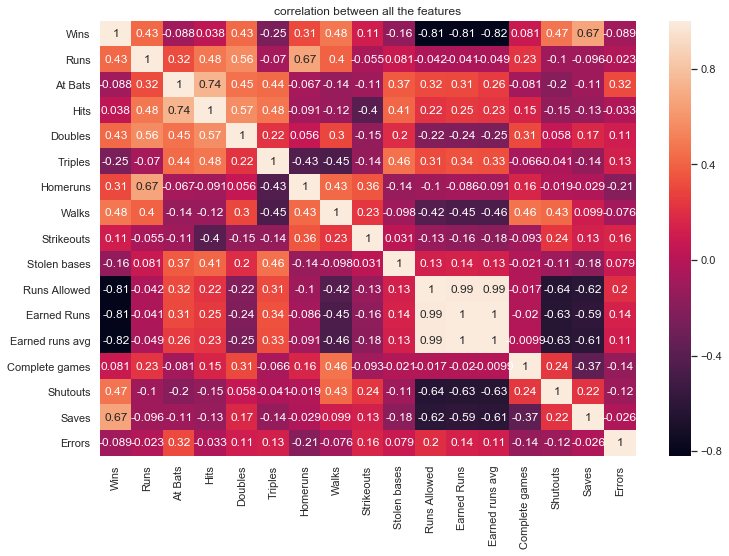

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.title("correlation between all the features")

In [10]:
# columns to be dropped
# atbats,
# hits
# triples
# strikeouts
# stolenbases
# complete games
# errors

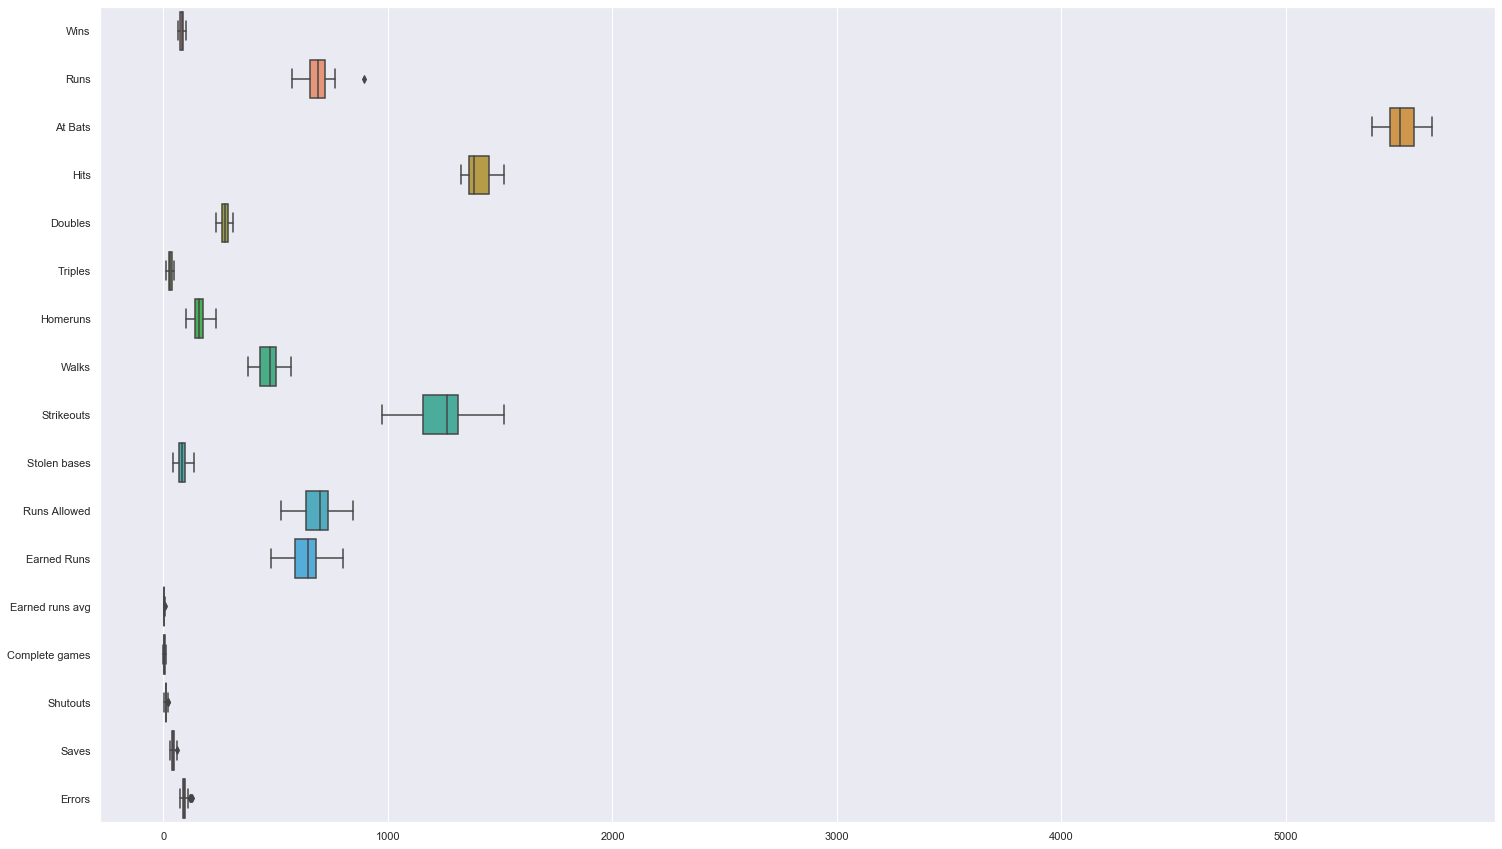

In [11]:
plt.figure(figsize=(25,15))
sns.boxplot(data=df,orient="h")

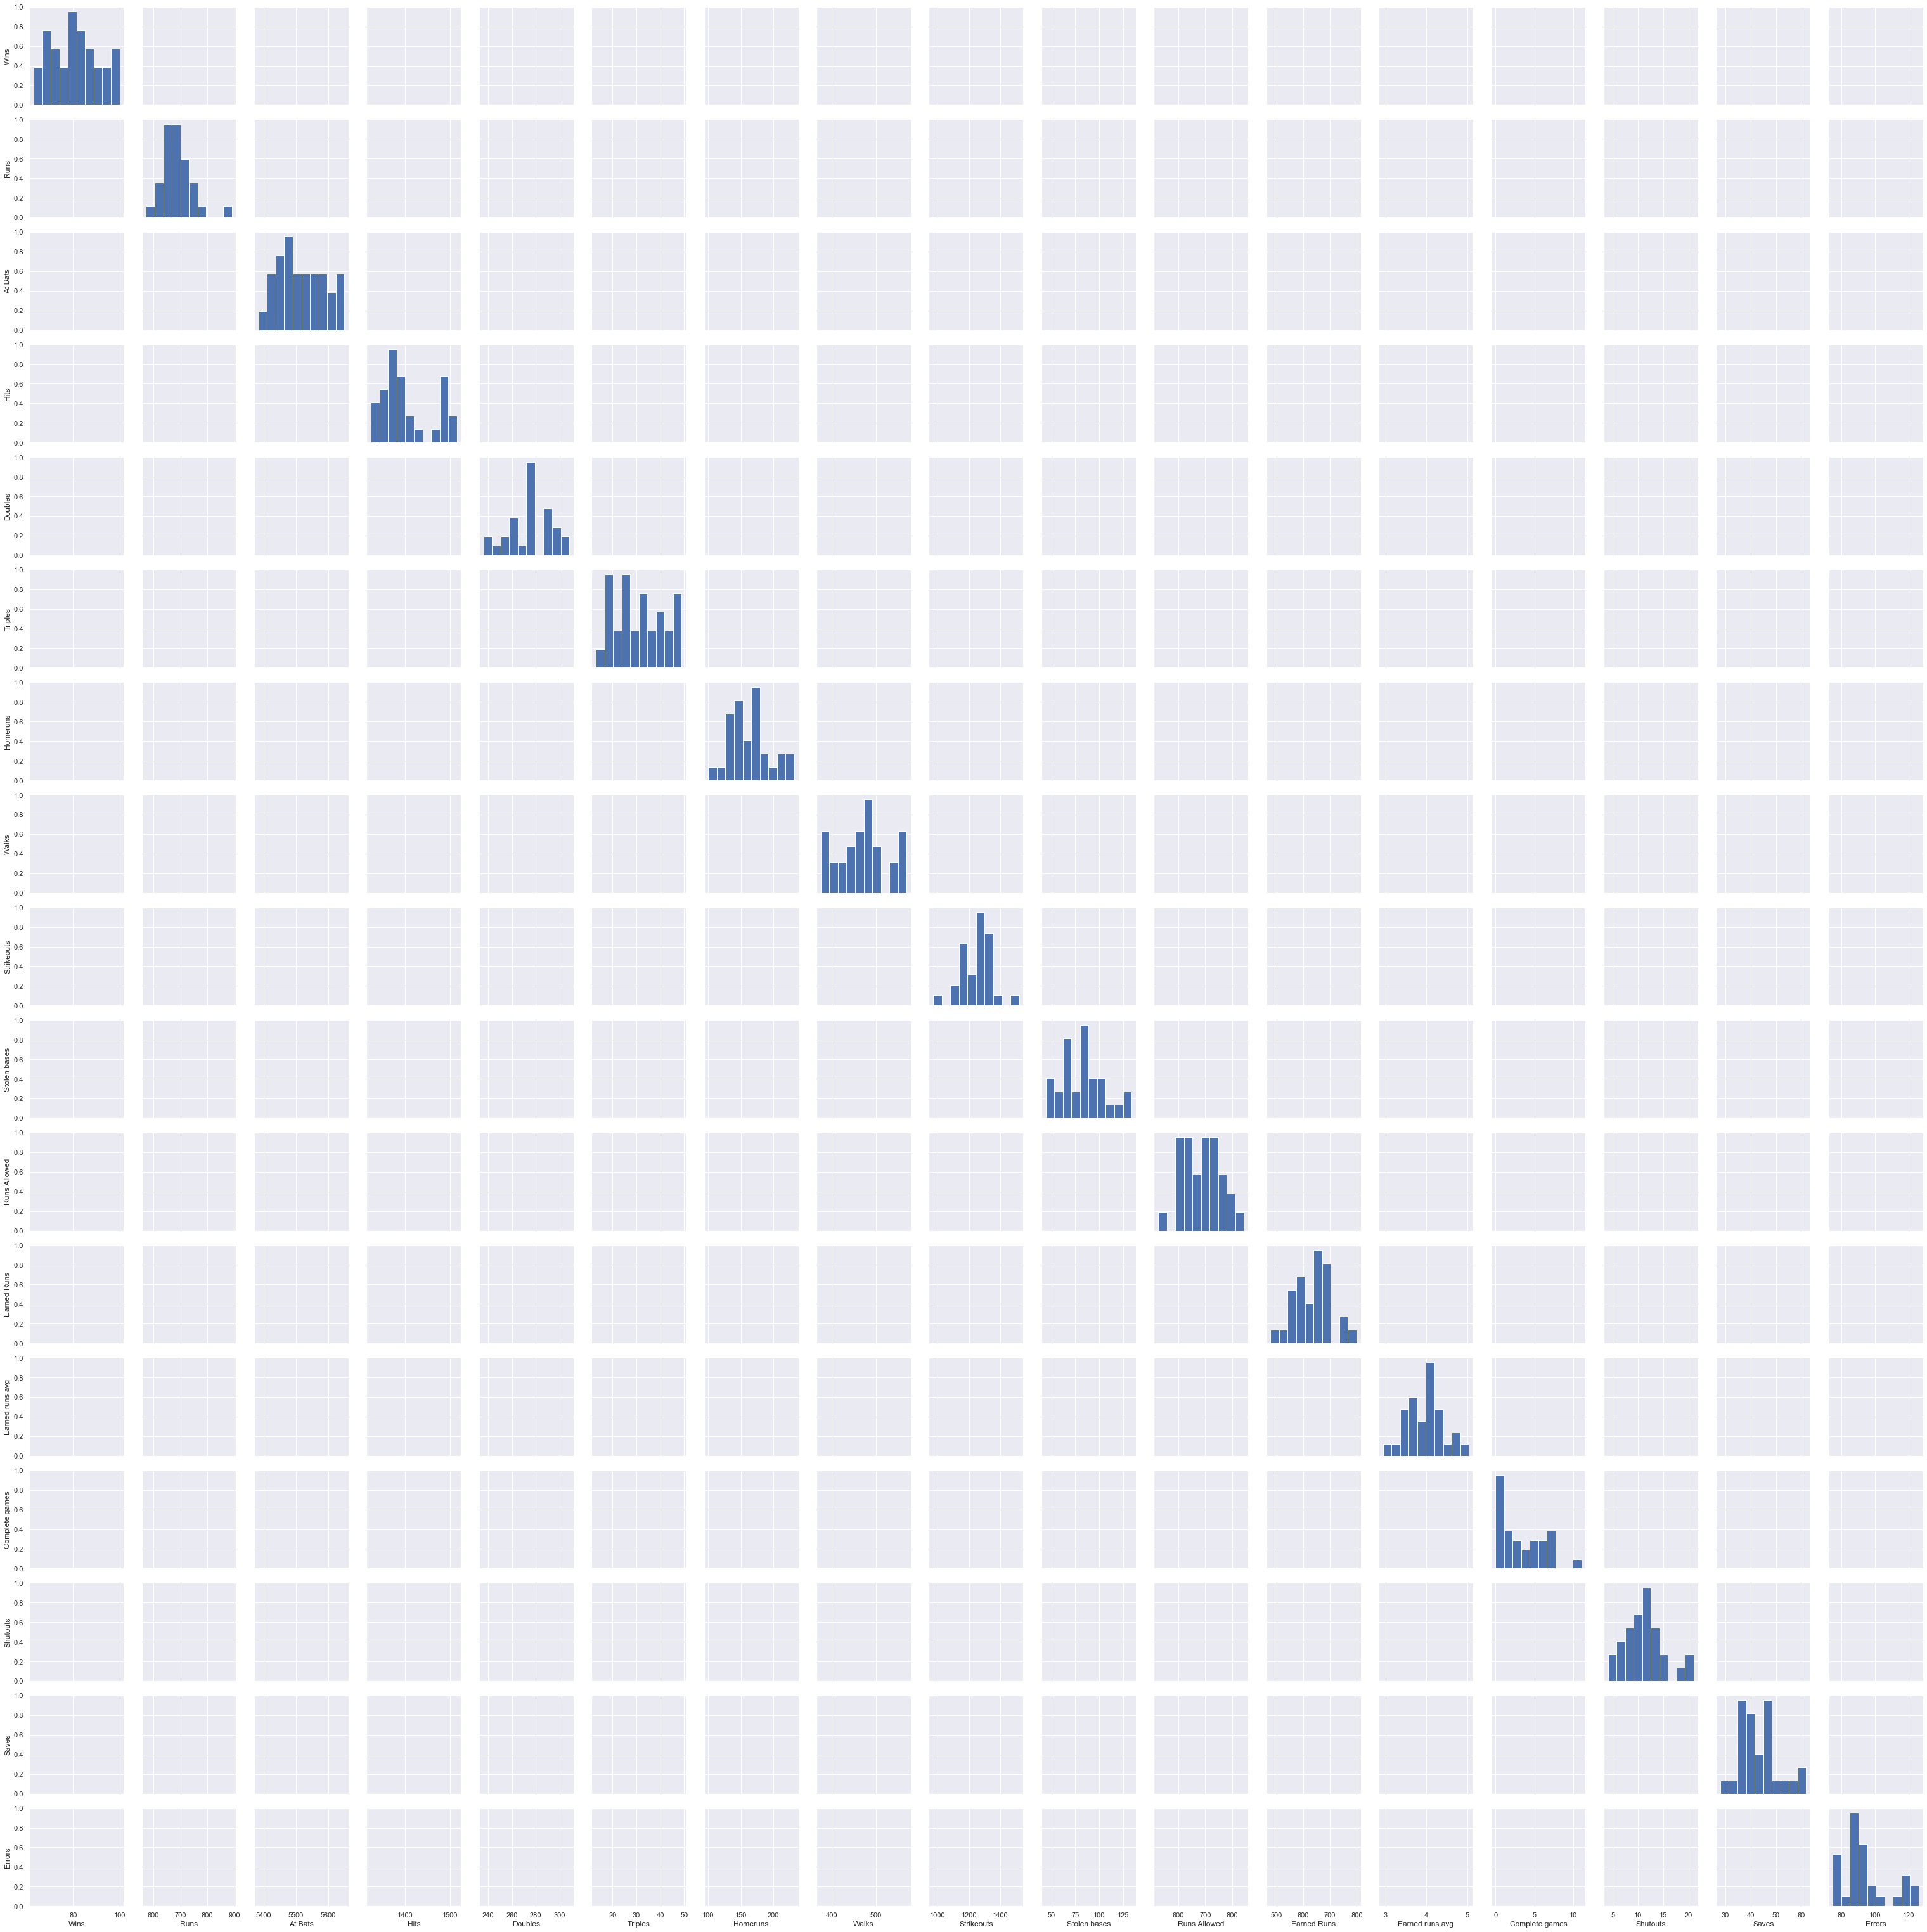

In [56]:
sns.pairplot(df,kind="kde")

### splitting into x and y

In [12]:
x=df.iloc[:,1:]
print(x.columns)

y=df["Wins"]
print(y.head())

Index(['Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks',
       'Strikeouts', 'Stolen bases', 'Runs Allowed', 'Earned Runs',
       'Earned runs avg', 'Complete games', 'Shutouts', 'Saves', 'Errors'],
      dtype='object')
0    95
1    83
2    81
3    76
4    74
Name: Wins, dtype: int64


### Train and testing the data with all the colums

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
count=0
random=range(101)
for numbers in random:
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.30,random_state=numbers)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    score=lr.score(x_train,y_train)
    pred_y=lr.predict(x_test)
    print("the score for random state",numbers,"is",score)
    
    if score>count:
        count = score
        final_number = numbers
print("\n")
print("the max score for random state",final_number,"is",count)

the score for random state 0 is 0.9740342087681648
the score for random state 1 is 0.9802780428217759
the score for random state 2 is 0.9945593908141707
the score for random state 3 is 0.9760342041610789
the score for random state 4 is 0.9653607276925373
the score for random state 5 is 0.9542874439438673
the score for random state 6 is 0.9548034139459609
the score for random state 7 is 0.9686347809215811
the score for random state 8 is 0.9684054066473846
the score for random state 9 is 0.9484846216491503
the score for random state 10 is 0.9752182474100012
the score for random state 11 is 0.9969972946030956
the score for random state 12 is 0.9850878634773941
the score for random state 13 is 0.9704921455725964
the score for random state 14 is 0.9591891446840402
the score for random state 15 is 0.9841540847884167
the score for random state 16 is 0.9923028076158746
the score for random state 17 is 0.9808080741066756
the score for random state 18 is 0.9759091652510714
the score for random s

In [14]:
lr.intercept_

111.81596557886714

In [15]:
lr.coef_

array([ 1.79216034e-01, -1.43565120e-02, -1.55333338e-02, -1.25792968e-01,
        1.16214232e-01, -1.01046800e-01, -4.98303677e-02,  9.17782974e-03,
        4.89212548e-02,  5.07202499e-01, -3.35100766e-01, -3.89690098e+01,
        7.45760605e-01,  1.26819791e-01,  8.07710569e-01, -1.94238453e-01])

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.30,random_state=84)
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
pred_y=lr.predict(x_test)
print(pred_y)

0.9985306570373883
[ 79.33008435 131.41326925  89.11253718  67.67696649 110.68736067
  52.09502553  79.12480053  83.69925098  63.36761184]


In [59]:
from sklearn import metrics
#print result of MAE
print(metrics.mean_absolute_error(y_test,pred_y))

#print result of MSE
print(metrics.mean_squared_error(y_test,pred_y))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,pred_y)))



5.139448900050738
34.176414416295636
5.846059734239433
0.2423947543185696


### Train and testing the data while dropping the very weak correlated columns

#now lets see if we drop the less corelated columns , will our rmse decrease or not?

# columns to be dropped:--

# atbats,---AB
# hits----H
# triples-----3B
# strikeouts-----SO
# stolenbases-----SB
# complete games-----CG
# errors-----E

In [88]:
newdf=pd.read_csv("baseballdata.csv")
newdf.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [89]:
newdf=newdf.drop("AB",axis=1)
newdf=newdf.drop("H",axis=1)
newdf=newdf.drop("3B",axis=1)
newdf=newdf.drop("SO",axis=1)
newdf=newdf.drop("SB",axis=1)
newdf=newdf.drop("CG",axis=1)
newdf=newdf.drop("E",axis=1)

In [28]:
newdf.columns

Index(['W', 'R', '2B', 'HR', 'BB', 'RA', 'ER', 'ERA', 'SHO', 'SV'], dtype='object')

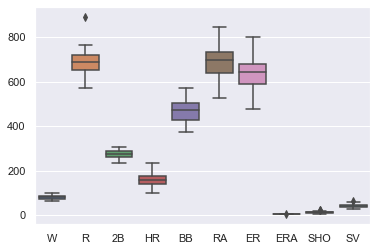

In [90]:
sns.boxplot(data=newdf)

In [91]:
newdf.shape

(30, 10)

In [92]:
x1=newdf.iloc[:,1:]
x1.columns

y1=newdf["W"]
y1.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [93]:
count=0
random=range(101)
for numbers in random:
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1,test_size=.30,random_state=numbers)
    lr=LinearRegression()
    lr.fit(x1_train,y1_train)
    score=lr.score(x1_train,y1_train)
    pred_y=lr.predict(x1_test)
    print("the score for random state",numbers,"is",score)
    
    if score>count:
        count = score
        final_number = numbers
print("\n")
print("the max score for random state",final_number,"is",count)

the score for random state 0 is 0.9261606628511179
the score for random state 1 is 0.9221691820441288
the score for random state 2 is 0.9451028854469413
the score for random state 3 is 0.9180501619459878
the score for random state 4 is 0.8876843229955121
the score for random state 5 is 0.9170839046305905
the score for random state 6 is 0.9149528072099332
the score for random state 7 is 0.92342534277874
the score for random state 8 is 0.9121623630662886
the score for random state 9 is 0.9249654533573369
the score for random state 10 is 0.947612523399392
the score for random state 11 is 0.9657121353268384
the score for random state 12 is 0.9391519869702677
the score for random state 13 is 0.9331060937369265
the score for random state 14 is 0.9396759125588369
the score for random state 15 is 0.9318936776291127
the score for random state 16 is 0.9681001946459636
the score for random state 17 is 0.9064169712624847
the score for random state 18 is 0.936585653956937
the score for random state

In [97]:
#finalising the best model

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1,test_size=.30,random_state=88)
lr1=LinearRegression()
lr1.fit(x1_train,y1_train)
print(lr1.score(x1_train,y1_train))
pred_y1=lr1.predict(x1_test)
print(pred_y1)
print((lr1.coef_)*100)
print(lr1.intercept_)
print(y1_test)

0.9740731871583823
[84.9438507  71.33219441 74.33236578 71.7479785  69.94483098 68.5406136
 90.95542664 90.40196354 83.39013327]
[ 10.20262253   1.14568247  -3.2671358   -1.07337626  -2.82384115
  -4.39963357 359.90624215  81.99610703  64.94807284]
14.635554509763438
27    79
28    74
14    68
18    68
3     76
29    68
8     80
26    84
6     87
Name: W, dtype: int64


In [98]:
from sklearn import metrics
#print result of MAE
print(metrics.mean_absolute_error(y1_test,pred_y1))

#print result of MSE
print(metrics.mean_squared_error(y1_test,pred_y1))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y1_test,pred_y1)))

5.139448900050738
34.176414416295636
5.846059734239433


as we can see after dropping the very weak correlated columns we can se a significant amount of drop in rmse from 24 to 6.
The RMSE decreased when we removed these columns from the model. 
(Error is something we want to minimize, so a lower number for RMSE is better.)
Thus, it is unlikely that this feature is useful for predicting Wins, and should be removed from the model.

In [99]:
from sklearn.metrics import r2_score
print(r2_score(y1_test,pred_y1))

0.2423947543185696


As we are predicting human behaviour r-square value tends to be less than .5
According to Cohen (1992)  r-square value .12 or below indicate low, between .13 to .25 values indicate medium,
.26 or above and above values indicate high effect size. In this respect, my models is medium effect size, 
or very near high effect size.

In [101]:
from sklearn.externals import joblib
joblib.dump(lr1,"lr1_EVALPROJECT_7")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['lr1_EVALPROJECT_7']